In [4]:
from pylatex import Document, NoEscape
from pdf2image import convert_from_path
import tempfile
import os
from IPython.display import display, Image

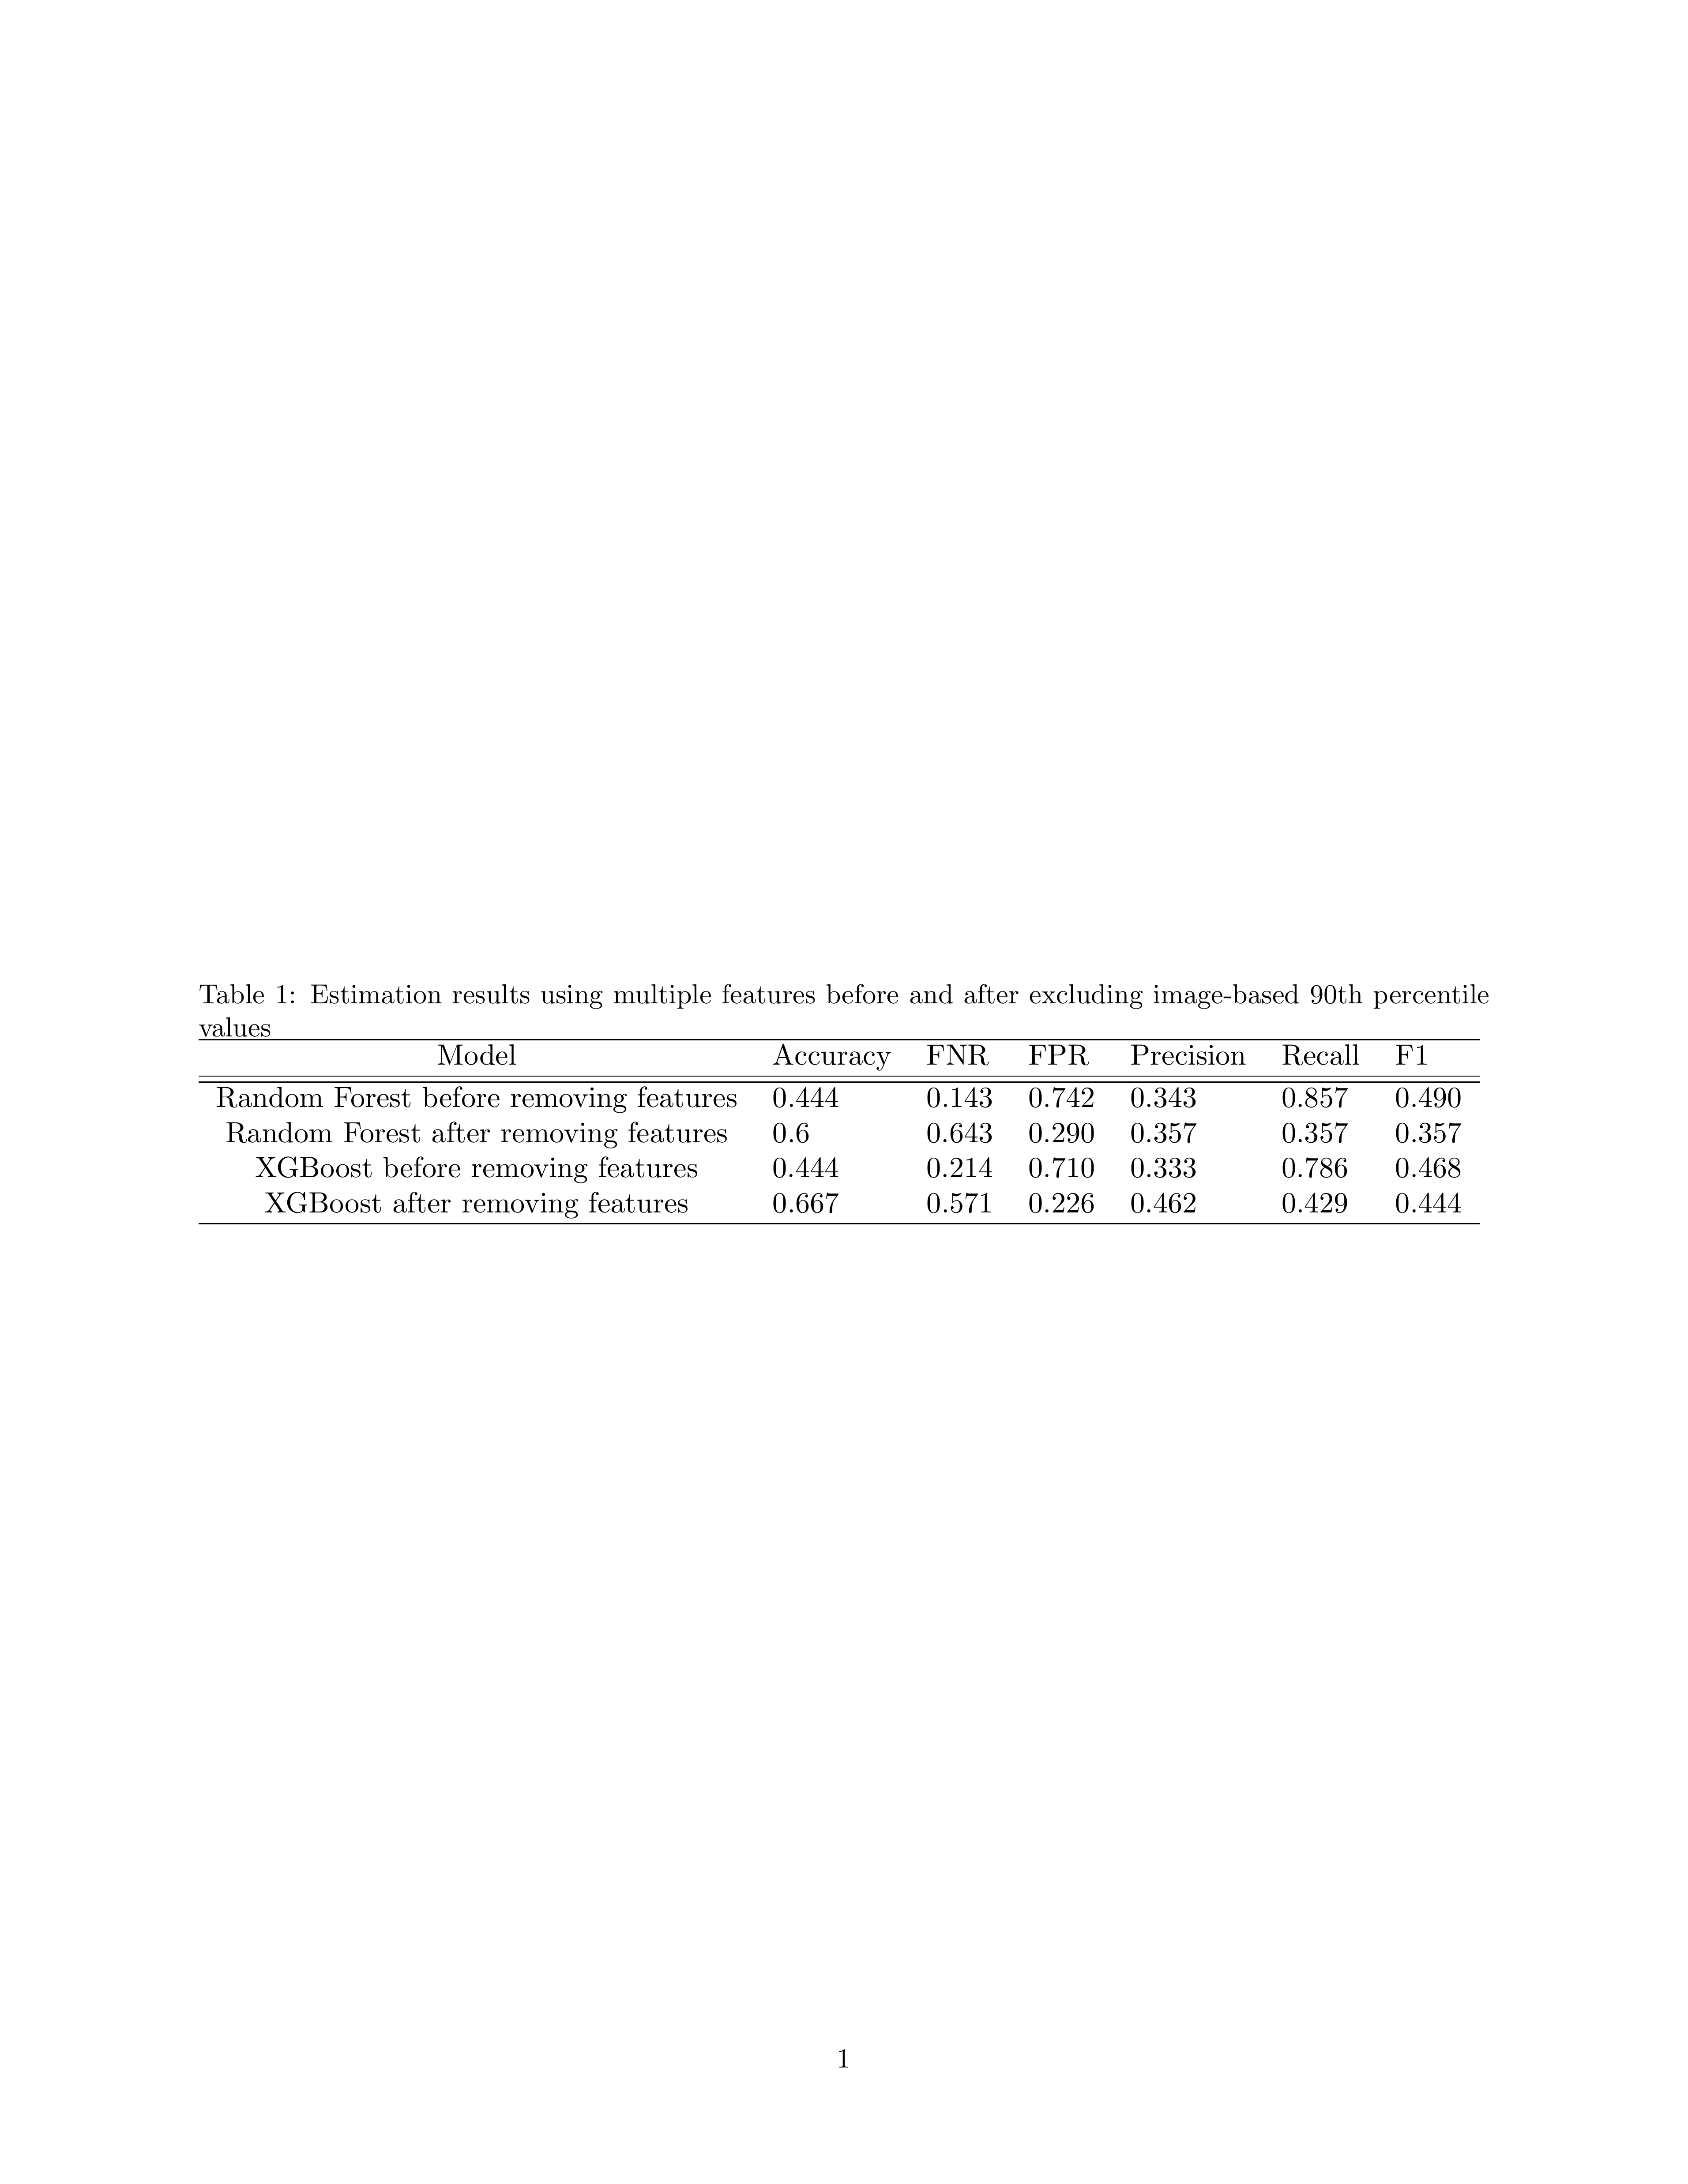

In [12]:
def latex_table_to_png(latex_table):
    """
    LaTeX形式の表をPNG画像として出力し表示する。
    
    :param latex_table: LaTeXの表の文字列
    """
    with tempfile.TemporaryDirectory() as temp_dir:
        temp_tex = os.path.join(temp_dir, 'table.tex')
        temp_pdf = os.path.join(temp_dir, 'table.pdf')
        temp_png = os.path.join(temp_dir, 'table.png')
        
        # LaTeX文書を作成
        doc_content = r"""
        \documentclass{article}
        \usepackage{graphicx}
        \usepackage{booktabs}
        \usepackage[margin=1in]{geometry}
        \begin{document}
        """ + latex_table + r"""
        \end{document}
        """
        
        with open(temp_tex, 'w', encoding='utf-8') as f:
            f.write(doc_content)
        
        # LaTeXをPDFに変換
        os.system(f'pdflatex -output-directory={temp_dir} {temp_tex}')
        
        # PDFをPNGに変換
        images = convert_from_path(temp_pdf, dpi=450)
        images[0].save(temp_png, 'PNG')
        
        # 画像を表示
        display(Image(filename=temp_png))

# 使用例
latex_table = r"""
\begin{table}[b]
	\caption{Estimation results using multiple features before and after excluding image-based 90th percentile values}
	\centering
	\resizebox{\columnwidth}{!}{%
		\begin{tabular}{cllllll} \hline
			Model                      								& Accuracy & FNR   & FPR   & Precision & Recall & F1      \\ \hline \hline
			Random Forest before removing features    & 0.444    & 0.143 & 0.742 & 0.343     & 0.857  & 0.490   \\
			Random Forest after removing features     & 0.6      & 0.643 & 0.290 & 0.357     & 0.357  & 0.357   \\
			XGBoost before removing features      	  & 0.444    & 0.214 & 0.710 & 0.333  	 & 0.786  & 0.468   \\
			XGBoost after removing features       	  & 0.667    & 0.571 & 0.226 & 0.462     & 0.429  & 0.444   \\  \hline
		\end{tabular}
	}
	\label{result_re_zncc90}
\end{table}


"""

latex_table_to_png(latex_table)
